### **Telecom Customer Churn Prediction**

In this project, I use customer data from a telecommunications company to train a **Machine Learning model** capable of predicting which customers are most likely to **cancel their services**.  
<br>

I will use the **CRISP-DM** methodology to guide the project
<br>
- Business Understanding  
- Data Understanding  
- Data Preparation  
- Modeling  
- Evaluation  
- Deployment (Results & Visuals)

In this notebook, I will focus on the EDA 
<br>

### **1. Business Problem**

Telecommunication companies frequently face **customer churn** — when users cancel their services and switch to competitors.  
This problem can **reduce revenue** and impact the company’s **long-term growth**.  
To address this challenge, the goal of this project is to build a **Machine Learning model** capable of **predicting which customers are most likely to leave**.

**Key objectives:**
- **Identify customers** at high risk of churn  
- **Understand** the main factors influencing churn  
- **Support decision-making** to improve customer retention



#### Importing the Libraries

In [4]:
#library imports for the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#Creating a palette for the visualizations
pl = ["#262870", "#FC6C1E", "#5656D6", "#F78243"]

#Show the pallet colors
sns.color_palette(pl).as_hex()

['#262870', '#fc6c1e', '#5656d6', '#f78243']

#### **2. Data Understanding**

- this dataset have been collected from kaggle   -   [Access via Kaggle](https://www.kaggle.com/datasets/mosapabdelghany/telcom-customer-churn-dataset)

In [5]:
#Loading the dataset
data = pd.read_csv("../data/Telecom_clients.csv")
data.shape

(7043, 21)

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Data Dictionary**

This section provides a detailed description of each column in the Telco Customer Churn dataset.
It includes customer demographic information, services subscribed, billing details, and churn status.

- **customerID**: Unique identifier for each customer 
- **gender**: Customer's gender - (Male/Female)
- **SeniorCitizen**: Indicates if the customer is a senior citizen - (1: Yes, 0: No)
- **Partner**: Indicates if the customer has a partner - (Yes/No)
- **Dependents**: Indicates if the customer has dependents - (Yes/No)
- **tenure**: Number of months the customer has been with the company
- **PhoneService**: Indicates if the customer has a phone service - (Yes/No)
- **MultipleLines**: Indicates if the customer has multiple lines - (Yes/No/No phone service)
- **InternetService**: Customer's internet service provider - (DSL/Fiber optic/No)
- **OnlineSecurity**: Indicates if the customer has online security - (Yes/No/No internet service)
- **OnlineBackup**: Indicates if the customer has online backup - (Yes/No/No internet service)
- **DeviceProtection**: Indicates if the customer has device protection - (Yes/No/No internet service)
- **TechSupport**: Indicates if the customer has tech support - (Yes/No/No internet service)
- **StreamingTV**: Indicates if the customer has streaming TV - (Yes/No/No internet service)
- **StreamingMovies**: Indicates if the customer has streaming movies - (Yes/No/No internet service)
- **Contract**: Customer's contract type - (Month-to-month/One year/Two year)
- **PaperlessBilling**: Indicates if the customer has paperless billing - (Yes/No)
- **PaymentMethod**: Customer's payment method - (Electronic check/Mailed check/Bank transfer/credit card)
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Indicates if the customer has churned - (Yes/No)


### **Exploratory Data Analysis (EDA)**

I will perform exploratory data analysis to better understand the characteristics of the dataset and identify relevant patterns or insights that can help in predictive modeling of customer churn.

In [7]:
#remove the 'customerID' column as it is not needed for analysis
data = data.drop(columns=['customerID'], axis=1)

I will look the percentage of customers in the dataset.

In [8]:
# View of the percentages of the categorical columns
categories = data.select_dtypes(include=['object', 'category']).columns

for col in categories:
    print(f"\n---- {col} ----")
    print(data[col].value_counts(normalize=True).round(3) * 100)


---- gender ----
gender
Male      50.5
Female    49.5
Name: proportion, dtype: float64

---- Partner ----
Partner
No     51.7
Yes    48.3
Name: proportion, dtype: float64

---- Dependents ----
Dependents
No     70.0
Yes    30.0
Name: proportion, dtype: float64

---- PhoneService ----
PhoneService
Yes    90.3
No      9.7
Name: proportion, dtype: float64

---- MultipleLines ----
MultipleLines
No                  48.1
Yes                 42.2
No phone service     9.7
Name: proportion, dtype: float64

---- InternetService ----
InternetService
Fiber optic    44.0
DSL            34.4
No             21.7
Name: proportion, dtype: float64

---- OnlineSecurity ----
OnlineSecurity
No                     49.7
Yes                    28.7
No internet service    21.7
Name: proportion, dtype: float64

---- OnlineBackup ----
OnlineBackup
No                     43.8
Yes                    34.5
No internet service    21.7
Name: proportion, dtype: float64

---- DeviceProtection ----
DeviceProtection
No  

- It's balanced in terms of gender, patner, and dependents.

    - About 26.5% of customers have churned, indicating a significant portion of the customer base is leaving the service.

I will look at some information about the customers who abandoned our service.

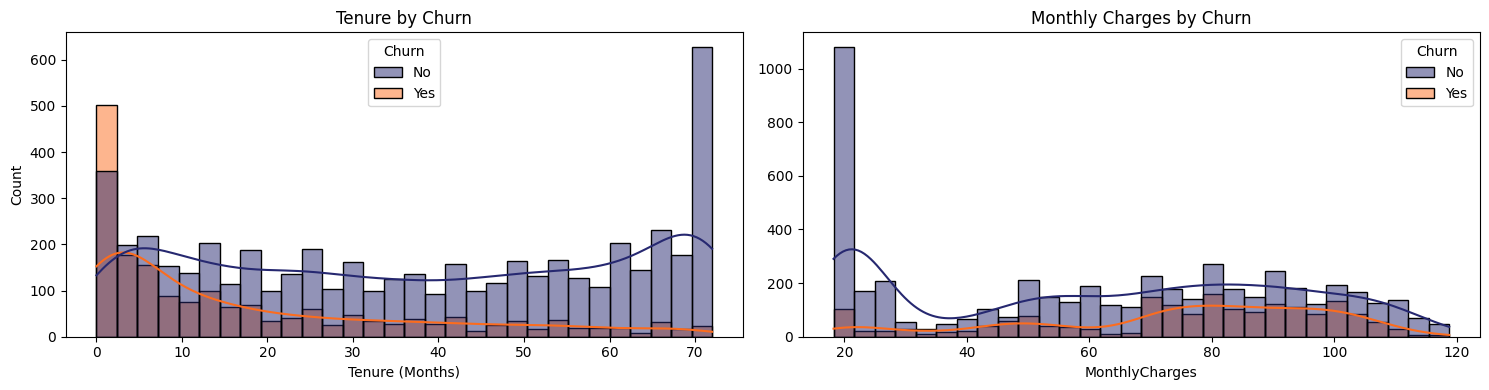

In [11]:
plt.figure(figsize=(15, 4))

# 1️ tenure
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='tenure', hue='Churn', bins=30, palette=pl[:2], kde=True)
plt.title('Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')

# 2️ MonthlyCharges
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', bins=30, palette=pl[:2], kde=True)
plt.title('Monthly Charges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('')

# Layout adjustment
plt.tight_layout()
plt.show()

- The customers who churned tend to have a shorter tenure with the company

##### I will look at the churned customers in the categorical features.

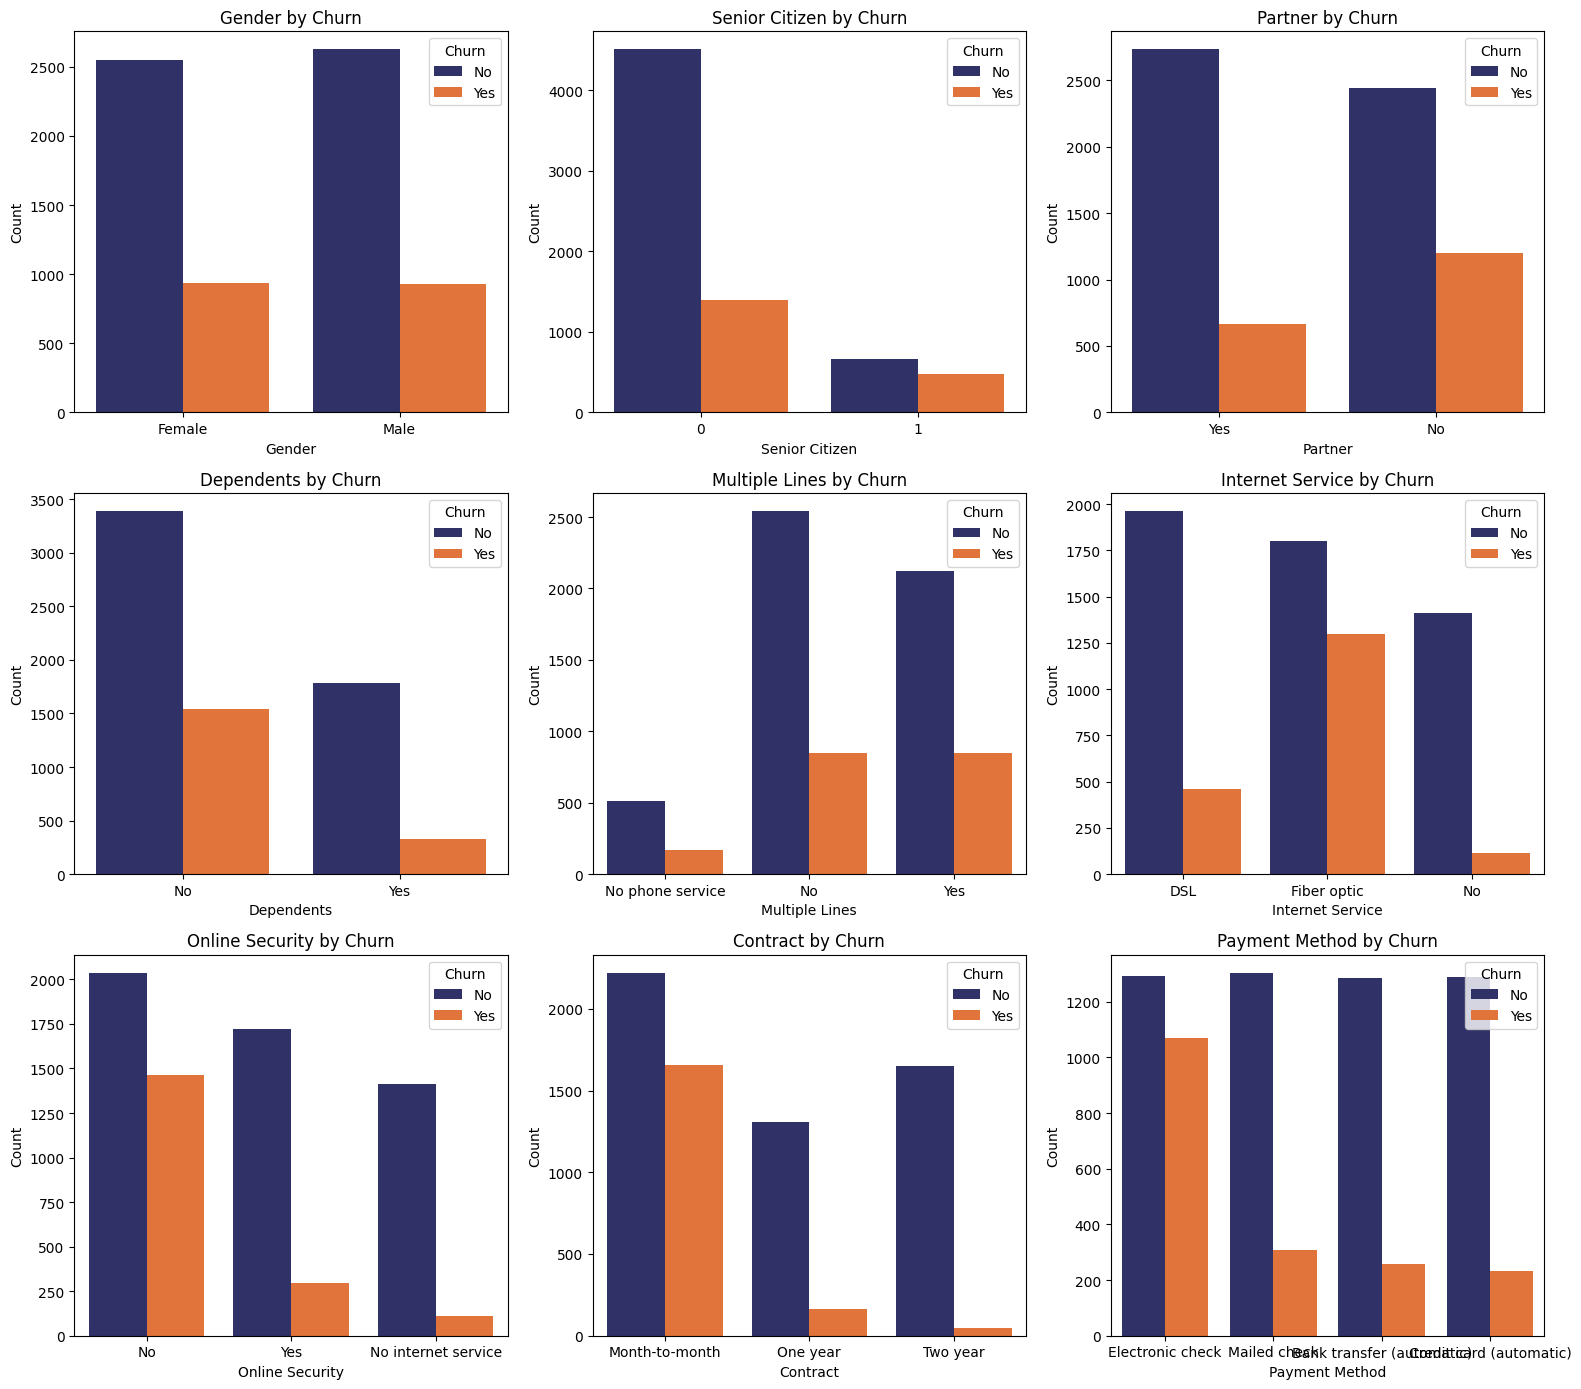

In [13]:
plt.figure(figsize=(16, 14))
# 1️ Gender
plt.subplot(3, 3, 1)
sns.countplot(data=data, x='gender', hue='Churn', palette=pl[:2])
plt.title('Gender by Churn')
plt.xlabel('Gender')
plt.ylabel('Count')

# 2 Senior Citizen
plt.subplot(3, 3, 2)
sns.countplot(data=data, x='SeniorCitizen', hue='Churn', palette=pl[:2])
plt.title('Senior Citizen by Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')

# 3 Partner
plt.subplot(3, 3, 3)
sns.countplot(data=data, x='Partner', hue='Churn', palette=pl[:2])
plt.title('Partner by Churn')
plt.xlabel('Partner')
plt.ylabel('Count')

# 4 Dependents
plt.subplot(3, 3, 4)
sns.countplot(data=data, x='Dependents', hue='Churn', palette=pl[:2])
plt.title('Dependents by Churn')
plt.xlabel('Dependents')
plt.ylabel('Count')

# 5 Multiple Lines
plt.subplot(3, 3, 5)
sns.countplot(data=data, x='MultipleLines', hue='Churn', palette=pl[:2])
plt.title('Multiple Lines by Churn')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')

# 6 Internet Service
plt.subplot(3, 3, 6)
sns.countplot(data=data, x='InternetService', hue='Churn', palette=pl[:2])
plt.title('Internet Service by Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')

# 7 Online Security
plt.subplot(3, 3, 7)
sns.countplot(data=data, x='OnlineSecurity', hue='Churn', palette=pl[:2])
plt.title('Online Security by Churn')
plt.xlabel('Online Security')
plt.ylabel('Count')

# 8 Contract
plt.subplot(3, 3, 8)
sns.countplot(data=data, x='Contract', hue='Churn', palette=pl[:2])
plt.title('Contract by Churn')
plt.xlabel('Contract')
plt.ylabel('Count')

# 8 Contract
plt.subplot(3, 3, 9)
sns.countplot(data=data, x='PaymentMethod', hue='Churn', palette=pl[:2])
plt.title('Payment Method by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Layout adjustment
plt.tight_layout()
plt.show()


With this information, I created a series of subplots to visualize the distribution of churned customers across various categorical features.  
From these visualizations, a few key insights emerge:

- **Internet Service**  
  The type of internet service appears to have a strong influence on churn rates.  
  Customers using *Fiber Optic* services show a noticeably higher tendency to churn compared to those using *DSL* or having *no internet service*.

- **Online Security**  
  Customers **without an online security plan** exhibit a much higher churn rate than those who have one,  
  suggesting that offering better security packages could improve retention.

- **Contract Type**  
  Customers on **month-to-month contracts** churn at a significantly higher rate than those with **one-year** or **two-year contracts**,  
  highlighting the importance of long-term agreements in maintaining customer loyalty.

- **Payment Method**  
  Customers who pay via **electronic checks** tend to churn more frequently than those using other payment methods,  
  indicating that payment preferences may also play a role in customer retention.


## **EDA Conclusion**

### **Key Insights**

- Customers who **churned** tend to have a **shorter tenure** with the company, suggesting that early-stage engagement may be a critical factor in retention.  

- Customers using **Fiber Optic** internet services show a **higher churn rate** compared to those using **DSL** or having **no internet service**, possibly due to service quality or pricing issues.  

- Customers **without an online security plan** are significantly more likely to churn than those who have one, indicating that **value-added services** can enhance customer loyalty.  

- Customers on **month-to-month contracts** churn at a much higher rate than those with **one-year** or **two-year contracts**, reinforcing the importance of **long-term commitments** in reducing churn.

<br>

### **Recommended Actions**

- **Encourage long-term contracts:** Offer discounts or exclusive benefits to incentivize customers to switch from month-to-month to longer-term contracts.  

- **Promote security add-ons:** Implement targeted marketing campaigns to encourage customers to subscribe to online security services, reducing the likelihood of churn.  

- **Improve Fiber Optic experience:** Investigate customer satisfaction and network performance issues related to Fiber Optic service to enhance reliability and reduce dissatisfaction-driven churn.

- **Tailor payment options:** Explore alternative payment methods or incentives for customers using electronic checks to improve their retention rates.

<br>

These findings provide valuable guidance for developing **customer retention strategies**, focusing on early engagement, service quality, and contractual stability.